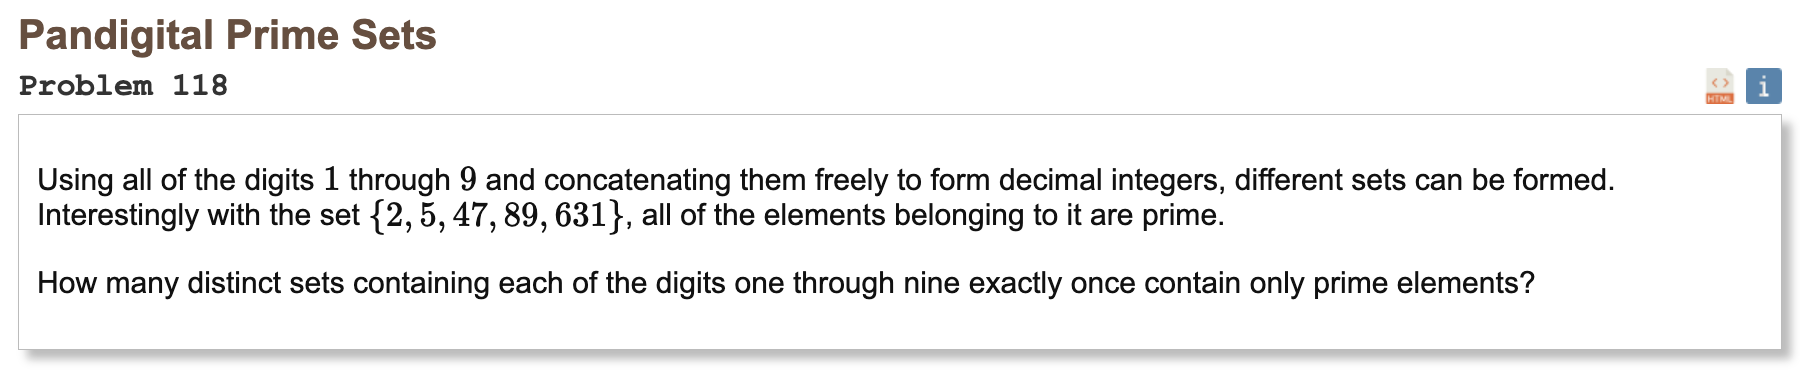

## Initial approach

* first, define the prime function

In [1]:
def is_prime(n):
    if n < 2:
        return False
    for i in range(2, n // 2 + 1):
        if n % i == 0:
            return False
    return True

* define all combinations

In [2]:
from itertools import combinations, permutations

all_combos = list()
prime_combos = list()

list_of_nums = [1,2,3,4,5,6,7,8,9]
for i in range(1,len(list_of_nums)+1):
    all_combos.extend(combinations(list_of_nums, i))

all_combos[0:10]

[(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (1, 2)]

* twist the approach little bit
* we must join all numbers to generate combinations

In [3]:
def generate_digit_primes(digs):
    last_bad = {'0','2','4','5','6','8'}
    primes = []
    for k in range(1, len(digs)+1):
        for p in permutations(digs, k):
            if k > 1 and p[-1] in last_bad:
                continue
            if k == 1 and p[0] not in {'2','3','5','7'}:
                continue
            val = int(''.join(p))
            if is_prime(val):
                primes.append((val, frozenset(p)))
    primes.sort(key=lambda x: x[0])
    return primes

def count_covers(primes, all_digits):
    target = frozenset(all_digits)
    results = 0
    stack = [(target, 0)]
    paths = [()]
    while stack:
        remaining, start_idx = stack.pop()
        curr = paths.pop()
        if not remaining:
            results += 1
            continue
        i = start_idx
        while i < len(primes):
            val, dset = primes[i]
            if dset.issubset(remaining):
                stack.append((remaining - dset, i + 1))
                paths.append(curr + (val,))
            i += 1
    return results

```python
digits = '123456789'
digit_primes = generate_digit_primes(digits)
answer = count_covers(digit_primes, digits)
print("Result:", answer)
```

* This approach is correct.
* it carries out millions of prime number check.
* so it's extremely slow. Needs to be optimized.